# Lab02 Lagrange Interpolation

- Name 路遥 
- Student Number:PB12203068 

## Algorithm Analysis

First, create create a macro to generate lagrange interpolation functions.

In [1]:
macro lagrange(xx,yy)

ex=:(0)
for (i,xi) in enumerate(xx)
        tmp=:(1)
    for (j,xj) in enumerate(xx)
            tmp=j!=i?:($tmp.*(x-$xj)./($xi-$xj)):tmp
    end
        ex=:($ex+$(yy[i])*$tmp)
end
    return :(L(x)=$ex)
end


In [4]:
q=:([1,2,3])
q.args[1]

1

Then, create a lagrange interpolation functions using given data.

In [2]:
N=10
f(x)=1./(1+x.^2)
xx=[-5+10/N*i for i=0:N]
yy=f(xx)
L10=@lagrange(xx,yy);

## Computational Results

### 1. For Evenly distributed interpolation points. 

In [4]:
for N in [5,10,20,40]
    f(x)=1./(1+x.^2)
    xx=[-5+10/N*i for i=0:N]
    yy=f(xx)
    L=@lagrange(xx,yy);
    L(1)
    y=[i/50-5 for i=0:500]
    interpValue=L(y)
    realValue=f(y)
    err=maximum(abs(interpValue-realValue))

    @printf "N=%d error=%16.12e\n" N err
end

N=5 error=5.976568477453e+01
N=10 error=5.976568477453e+01
N=20 error=5.976568477453e+01
N=40 error=5.976568477453e+01


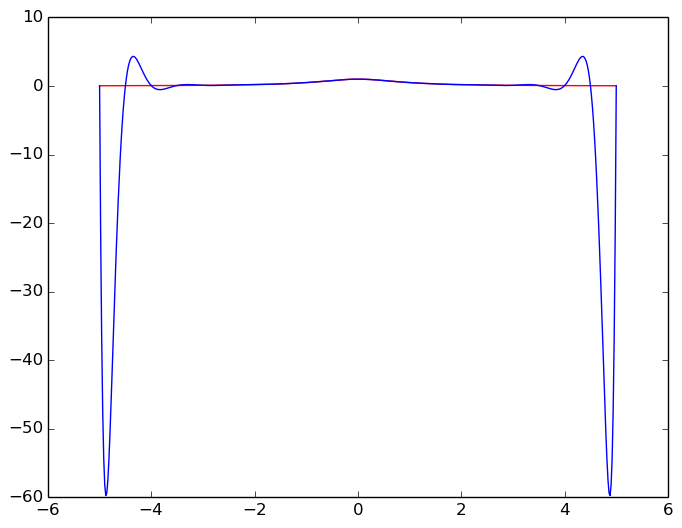

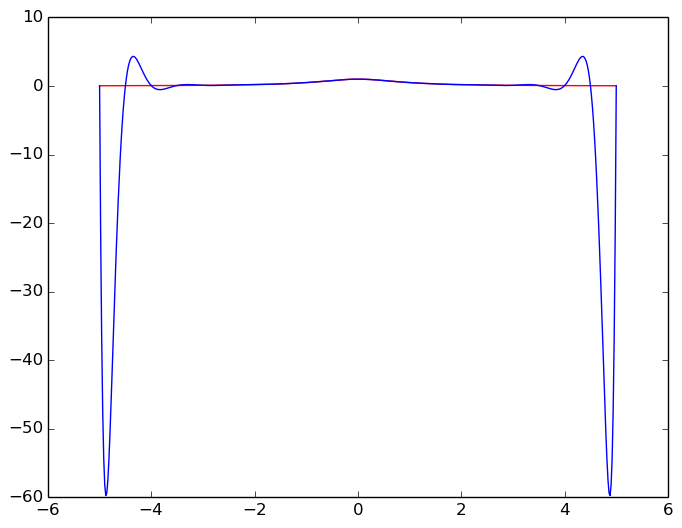

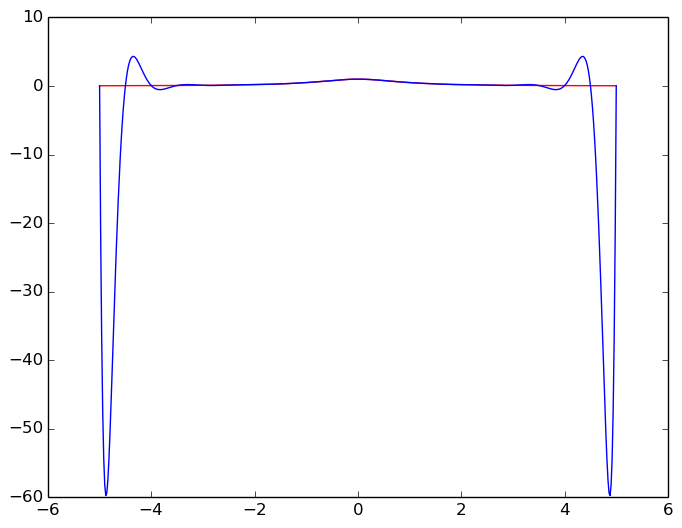

In [13]:
using PyPlot
for N in [5,10,20]
    f(x)=1./(1+x.^2)
    xx=[-5+10/N*i for i=0:N]
    yy=f(xx)
    L=@lagrange(xx,yy);

    y=[i/50-5 for i=0:500]
    interpValue=L(y)
    realValue=f(y)

    figure()
    title("N=$N")
    plot(y,realValue,"r");
    plot(y,interpValue,"b");
end

### 2. For Chebyshev  interpolation points. 

In [19]:
for N in [5,10,20,40]
    f(x)=1./(1+x.^2)
    xx=[-5*cos((2*i+1)/(2*N+2)*π) for i=0:N]
    yy=f(xx)
    L=@lagrange(xx,yy);

    y=[i/50-5 for i=0:500]
    interpValue=L(y)
    realValue=f(y)
    err=maximum(abs(interpValue-realValue))

    @printf "N=%d error=%16.12e\n" N err
end

N=5 error=1.532508854383e-02
N=10 error=1.532508854383e-02
N=20 error=1.532508854383e-02
N=40 error=1.532508854383e-02


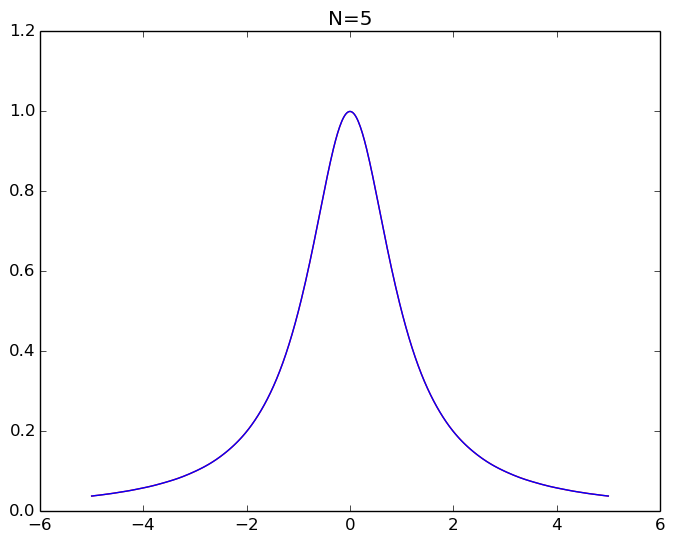

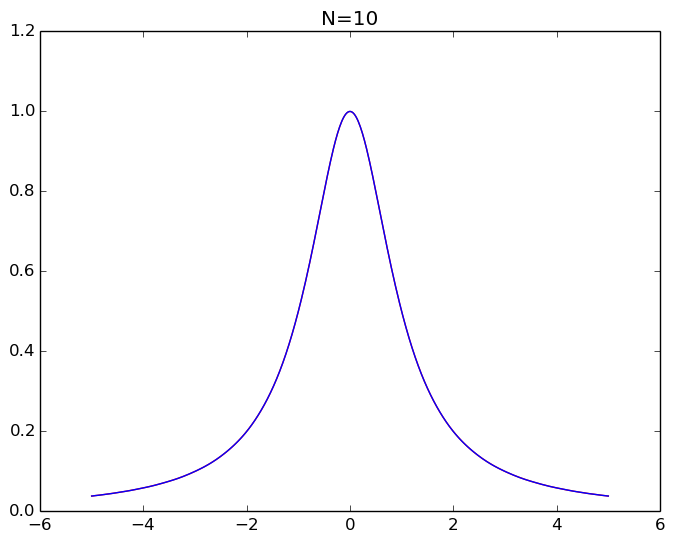

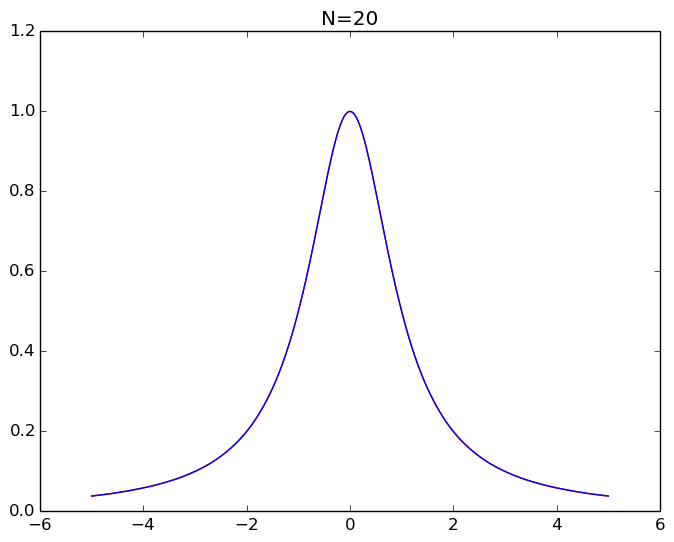

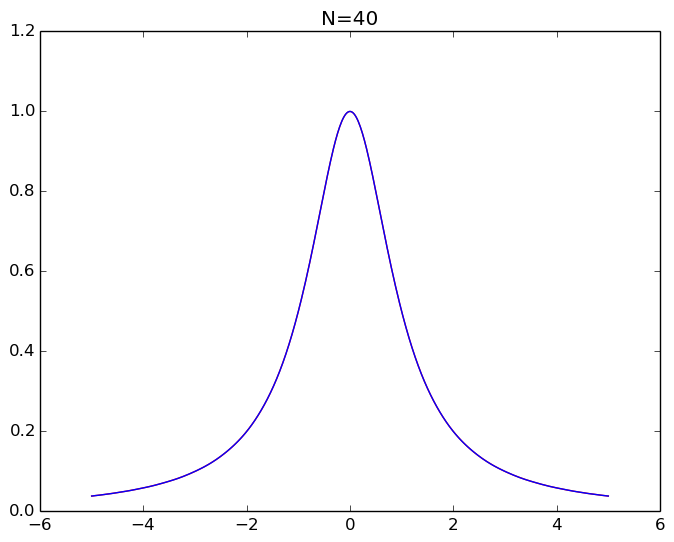

In [20]:
for N in [5,10,20,40]
    f(x)=1./(1+x.^2)
    xx=[-5*cos((2*i+1)/(2*N+2)*π) for i=0:N]
    yy=f(xx)
    L=@lagrange(xx,yy);

    y=[i/50-5 for i=0:500]
    interpValue=L(y)
    realValue=f(y)
    
    figure()
    title("N=$N")
    plot(y,realValue,"r");
    plot(y,interpValue,"b");
end

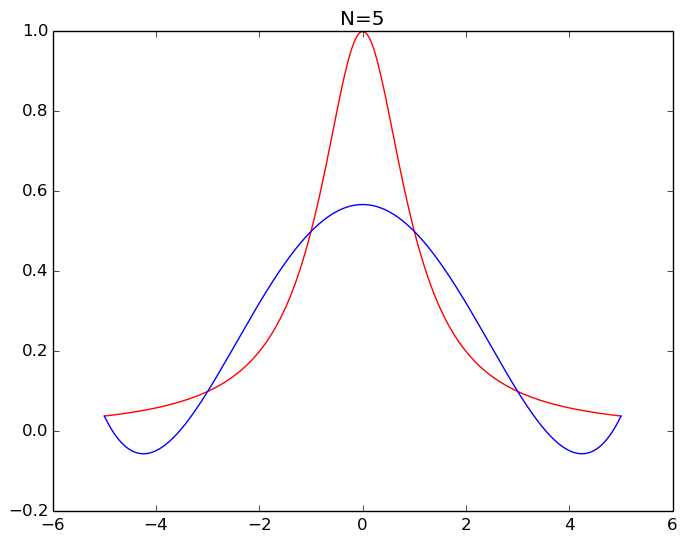

In [23]:
N=5
f(x)=1./(1+x.^2)
xx=[-5+10/N*i for i=0:N]
yy=f(xx)
L=@lagrange(xx,yy);

y=[i/50-5 for i=0:500]
interpValue=L(y)
realValue=f(y)

using PyPlot
figure()
title("N=$N")
plot(y,realValue,"r");
plot(y,interpValue,"b");

## Conclusion